# Car Price Prediction

### Dataset: [car-sale-advertisements](https://www.kaggle.com/antfarol/car-sale-advertisements)<br/>
### In this section we will explore the dataset and try to prepare it for pridiction.

### Some imports

In [56]:
!pip install category_encoders
!pip install dython

In [57]:
import numpy as np
import pandas as pd
from dython.nominal import correlation_ratio, associations 
import category_encoders as ce

## Dataset contains 9576 rows and 10 variables with essential meanings:

1. car: manufacturer brand
2. price: seller’s price in advertisement (in USD)
3. body: car body type
4. mileage: as mentioned in advertisement (‘000 Km)
5. engV: rounded engine volume (‘000 cubic cm)
6. engType: type of fuel 
7. registration: whether car registered in Ukraine or not
8. year: year of production
9. model: specific model name
10. drive: drive type


In [58]:
data = pd.read_csv('car_ad.csv', encoding='latin-1')
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [59]:
# set the dependent variable in the last column (what we want to predict)

column_names = ["car", "body", "mileage", "engV", "engType",
                "registration", "year", "model", "drive", "price"]

data = data.reindex(columns=column_names)
data.head(2)

,car,body,mileage,engV,engType,registration,year,model,drive,price
0,Ford,crossover,68,2.5,Gas,yes,2010,Kuga,full,15500.0
1,Mercedes-Benz,sedan,173,1.8,Gas,yes,2011,E-Class,rear,20500.0


# Explor the data set


In [60]:
data.describe()

,mileage,engV,year,price
count,9576.000000,9142.000000,9576.000000,9576.000000
mean,138.862364,2.646344,2006.605994,15633.317316
std,98.629754,5.927699,7.067924,24106.523436
min,0.000000,0.100000,1953.000000,0.000000
25%,70.000000,1.600000,2004.000000,4999.000000
50%,128.000000,2.000000,2008.000000,9200.000000
75%,194.000000,2.500000,2012.000000,16700.000000
max,999.000000,99.990000,2016.000000,547800.000000


In [61]:
# check number of nulls values in each variable
data.isnull().sum()

car               0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
price             0
dtype: int64

In [62]:
# check number of duplicated data
data.duplicated().sum()


113

In [63]:
# take a look in the data to see the values
for i in data.columns:
    print(data[str(i)].value_counts())


Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
SMA                1
Other-Retro        1
Buick              1
TATA               1
Wartburg           1
Name: car, Length: 87, dtype: int64
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64
0      348
1      304
200    171
150    131
250    128
      ... 
427      1
840      1
920      1
419      1
435      1
Name: mileage, Length: 442, dtype: int64
2.00     1539
1.60     1229
3.00      703
1.50      692
1.80      585
         ... 
1.36        1
22.00       1
1.79        1
1.35        1
2.28        1
Name: engV, Length: 117, dtype: int64
Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64
yes    9015
no      561
Name: registration, dtype: int64
2008    1158
2007     930
2012     767
2011     701
2013     651
2006     564
2016     459
2005     4

In [64]:
# cars with 0 price
data.query('price == 0.0')

,car,body,mileage,engV,engType,registration,year,model,drive,price
20,Land Rover,crossover,0,4.4,Diesel,yes,2016,Range Rover,full,0.0
53,Mercedes-Benz,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full,0.0
70,Mercedes-Benz,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full,0.0
71,Toyota,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full,0.0
90,Porsche,sedan,22,4.8,Petrol,yes,2014,Panamera,full,0.0
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,hatch,76,1.0,Petrol,yes,2007,Aygo,front,0.0
9025,Mercedes-Benz,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full,0.0
9036,Ford,other,1,5.0,Petrol,yes,2014,Mustang,rear,0.0
9442,Renault,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front,0.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   body          9576 non-null   object 
 2   mileage       9576 non-null   int64  
 3   engV          9142 non-null   float64
 4   engType       9576 non-null   object 
 5   registration  9576 non-null   object 
 6   year          9576 non-null   int64  
 7   model         9576 non-null   object 
 8   drive         9065 non-null   object 
 9   price         9576 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [66]:
data.query('price == 0.0 & engV != engV & drive != drive')

,car,body,mileage,engV,engType,registration,year,model,drive,price
3711,Volkswagen,van,1,NaN,Diesel,yes,2005,Caddy ïàññ.,NaN,0.0
4038,GAZ,other,1,NaN,Other,yes,1958,69,NaN,0.0
4864,BMW,crossover,16,NaN,Other,yes,2016,X5 M,NaN,0.0
6841,Mazda,other,90,NaN,Other,yes,2004,RX-8,NaN,0.0
8824,Fisker,other,100,NaN,Other,yes,2001,Karma,NaN,0.0


### Check the correlation

In [67]:
corrs = [correlation_ratio(data[i], data.engV) for i in data.columns]
corr_engV = pd.DataFrame({'all_features': data.columns, 'corr_with_engV': corrs
                                    }).sort_values('corr_with_engV', ascending=False)
corr_engV

,all_features,corr_with_engV
3,engV,1.000000
7,model,0.394844
9,price,0.357558
2,mileage,0.300628
6,year,0.183337
0,car,0.128332
8,drive,0.094260
1,body,0.071281
4,engType,0.020124
5,registration,0.016033


In [68]:
corrs = [correlation_ratio(data[i], data.price) for i in data.columns]
corr_price = pd.DataFrame({'all_features': data.columns, 'corr_with_price': corrs
                                    }).sort_values('corr_with_price', ascending=False)
corr_price

,all_features,corr_with_price
9,price,1.000000
7,model,0.790405
3,engV,0.566043
0,car,0.538755
6,year,0.503833
2,mileage,0.462838
8,drive,0.393186
1,body,0.324923
4,engType,0.124806
5,registration,0.120849


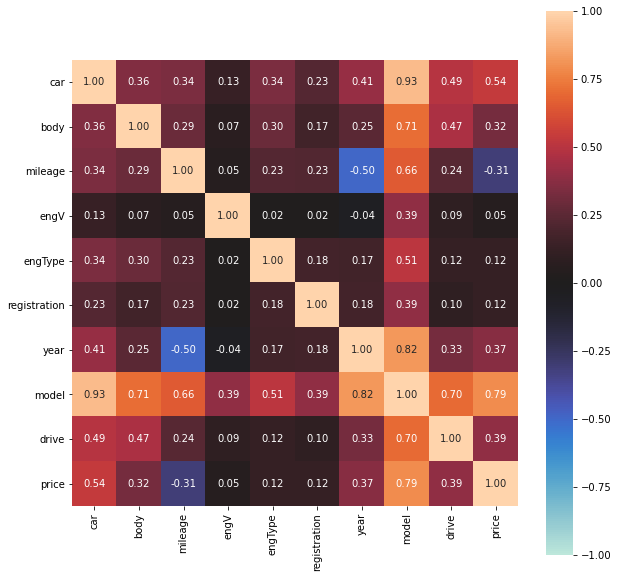

{'corr':                    car      body   mileage      engV   engType  registration  \
 car           1.000000  0.357449  0.337847  0.128332  0.336599      0.232995   
 body          0.357449  1.000000  0.289424  0.071281  0.296105      0.170680   
 mileage       0.337847  0.289424  1.000000  0.049949  0.229724      0.225007   
 engV          0.128332  0.071281  0.049949  1.000000  0.020124      0.016033   
 engType       0.336599  0.296105  0.229724  0.020124  1.000000      0.178272   
 registration  0.232995  0.170680  0.225007  0.016033  0.178272      1.000000   
 year          0.409140  0.245498 -0.495599 -0.040747  0.171393      0.177738   
 model         0.927393  0.709402  0.655655  0.394844  0.510637      0.392285   
 drive         0.493450  0.467497  0.237101  0.094260  0.122849      0.096821   
 price         0.538755  0.324923 -0.312415  0.049100  0.124806      0.120849   
 
                   year     model     drive     price  
 car           0.409140  0.927393  0.493450

In [69]:
associations(data, figsize=(10,10))

## From exploration we can see that we have some problems in the data set:

1. nulls in [engv, drive]
2. registration should be 0/1
3. cars with zero price
4. There are many categorical columns ["car", "body", "engType", "model", "drive"]


## we need some helpers 

In [70]:
def onehot_encode(feat, data, dummy_na=False):
    # given a categorical column,
    # perform onehot encode and return encoded DF together with names of new binary columns
    categories = data[feat].unique()
    # print('there are', len(categories), 'categories in', feat,'as follows:')
    # print(categories)
    
    encoded = pd.get_dummies(data[feat], prefix=feat, dummy_na=dummy_na)
    res = pd.concat([data.drop(columns=[feat]), encoded], axis='columns')

    return res

# We will take four approchs to solve these problems

### The first one:

    - replace nulls in engV with the mean  
    - replace nulls in drive with "other"
    - keep rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns applay one-hot-encoding
 
 
### The second one:

    - replace nulls in engV with mean of "model" engV or "car" engV mean or global engV mean
    - replace nulls in drive with the most appear in "model" or in "car" or in global
    - keep rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns applay one-hot-encoding


### The third one:

    - replace nulls in engV with mean of "model" engV 
    - replace nulls in drive with the most appear in "model"
    - replace other (as suggested by data collecter) in engType with the most appear in "model"
    - delete rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns
        if the values < 5 we will applay one-hot-encoding
        if the values > 5 we will apllay target-encoding


### What is target-encoding ?

- Target encoding: encode each category by the average value of target/outcome (if target is continuous) within that category; or by the probability of target if it is discrete.

## Why we don't use one-hot-encoding
to prevent large number of features 

# First approch
    - replace nulls in engV with the mean  
    - replace nulls in drive with "other"
    - keep rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns applay one-hot-encoding

In [71]:
# copy the data
cleaned_data1 = data.copy()

In [72]:
# check number of nulls values in each variable
cleaned_data1.isnull().sum()

car               0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
price             0
dtype: int64

In [73]:
# fix nulls in engV
cleaned_data1.engV = data.engV.fillna(data.engV.mean())
cleaned_data1.isnull().sum()

car               0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
price             0
dtype: int64

In [74]:
# fix nulls in drive
cleaned_data1.drive = cleaned_data1.drive.replace(np.nan, "other")
cleaned_data1.isnull().sum()

car             0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
price           0
dtype: int64

In [75]:
# convert yes/no in registration to 1/0
cleaned_data1.registration = cleaned_data1.registration.replace('yes', 1.0)
cleaned_data1.registration = cleaned_data1.registration.replace('no', 0.0)
cleaned_data1.registration = cleaned_data1.registration.astype('int64')
cleaned_data1.registration.value_counts()

1    9015
0     561
Name: registration, dtype: int64

In [76]:
# applay one-hot-encoding for all categorical columns
features = ["car", "body", "engType", "model", "drive"]
for i in features:
    cleaned_data1 = onehot_encode(i, cleaned_data1)

cleaned_data1.head()

,mileage,engV,registration,year,price,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,...,model_i30,model_ix55 (Veracruz),model_Êëàññè÷åñêèå,model_Ïàòðèîò,model_Ïðèîðà,model_Òàâðèÿ-Íîâà,drive_front,drive_full,drive_other,drive_rear
0,68,2.500000,1,2010,15500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,173,1.800000,1,2011,20500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,135,5.500000,1,2008,35000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,162,1.800000,1,2012,17800.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,91,2.646344,1,2013,33000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Set price column at the end of the data frame

In [77]:
target = 'price'
features = cleaned_data1.columns.drop(target).to_list()
features
cleaned_data1 = cleaned_data1[features + [target]]
cleaned_data1.head(1)

,mileage,engV,registration,year,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,...,model_ix55 (Veracruz),model_Êëàññè÷åñêèå,model_Ïàòðèîò,model_Ïðèîðà,model_Òàâðèÿ-Íîâà,drive_front,drive_full,drive_other,drive_rear,price
0,68,2.5,1,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15500.0


### Save our first cleaned dataset

In [78]:
cleaned_data1.to_csv("cleaned_data1.csv")

# Second approch

    - replace nulls in engV with mean of "model" engV or "car" engV mean or global engV mean
    - replace nulls in drive with the most appear in "model" or in "car" or in global
    - keep rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns applay one-hot-encoding


In [79]:
# copy the data
cleaned_data2 = data.copy()

In [80]:
# check number of nulls values in each variable
cleaned_data2.isnull().sum()

car               0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
price             0
dtype: int64

In [81]:
# fix nulls in engV

models_means = cleaned_data2.groupby(["model"]).engV.mean()
cars_means = cleaned_data2.groupby(["car"]).engV.mean()
global_mean = cleaned_data2.engV.mean()
missed = cleaned_data2[cleaned_data2['engV'].isnull()]


for m in missed.index:
    car = cleaned_data2.at[m, "car"]
    model = cleaned_data2.at[m , "model"]
    cleaned_data2.at[m , "engV"] = global_mean
    if car in cars_means:
        if cars_means[car] == cars_means[car]: # if its nan 
            cleaned_data2.at[m , "engV"] = cars_means[car]
    if model in models_means:
        if  models_means[model] == models_means[model]: # if its nan 
            cleaned_data2.at[m , "engV"] = models_means[model]


cleaned_data2.isnull().sum()


car               0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
price             0
dtype: int64

In [82]:
# fix nulls in drive

models_tops = cleaned_data2.groupby(["model"]).drive.describe().top
cars_tops = cleaned_data2.groupby(["car"]).drive.describe().top
global_top = cleaned_data2.drive.describe().top
missed = cleaned_data2[cleaned_data2['drive'].isnull()]


for m in missed.index:
    car = cleaned_data2.at[m, "car"]
    model = cleaned_data2.at[m , "model"]
    cleaned_data2.at[m , "drive"] = global_top
    if car in cars_tops:
        if cars_tops[car] == cars_tops[car]: # if its nan 
            cleaned_data2.at[m , "drive"] = cars_tops[car]
    if model in models_tops:
        if  models_tops[model] == models_tops[model]: # if its nan 
            cleaned_data2.at[m , "drive"] = models_tops[model]


cleaned_data2.isnull().sum()

car             0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
price           0
dtype: int64

In [83]:
# convert yes/no in registration to 1/0
cleaned_data2.registration = cleaned_data2.registration.replace('yes', 1.0)
cleaned_data2.registration = cleaned_data2.registration.replace('no', 0.0)
cleaned_data2.registration = cleaned_data2.registration.astype('int64')
cleaned_data2.registration.value_counts()

1    9015
0     561
Name: registration, dtype: int64

In [84]:
# applay one-hot-encoding for all categorical columns
features = ["car", "body", "engType", "model", "drive"]
for i in features:
    cleaned_data2 = onehot_encode(i, cleaned_data2)

cleaned_data2.head()

,mileage,engV,registration,year,price,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,...,model_i20,model_i30,model_ix55 (Veracruz),model_Êëàññè÷åñêèå,model_Ïàòðèîò,model_Ïðèîðà,model_Òàâðèÿ-Íîâà,drive_front,drive_full,drive_rear
0,68,2.500000,1,2010,15500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,173,1.800000,1,2011,20500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,135,5.500000,1,2008,35000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,162,1.800000,1,2012,17800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,91,2.557887,1,2013,33000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Set price column at the end of the data frame

In [85]:
target = 'price'
features = cleaned_data2.columns.drop(target).to_list()
features
cleaned_data2 = cleaned_data2[features + [target]]
cleaned_data2.head(1)

,mileage,engV,registration,year,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,...,model_i30,model_ix55 (Veracruz),model_Êëàññè÷åñêèå,model_Ïàòðèîò,model_Ïðèîðà,model_Òàâðèÿ-Íîâà,drive_front,drive_full,drive_rear,price
0,68,2.5,1,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,15500.0


### Save our second cleaned dataset

In [86]:
cleaned_data2.to_csv("cleaned_data2.csv")

# The third approch

    - replace nulls in engV with mean of "model" engV 
    - replace nulls in drive with the most appear in "model"
    - replace other (as suggested by data collecter) in engType with the most appear in "model"
    - delete rows that contain zero price
    - convert yes/no in registration to 1/0
    - for categorical columns
        if the values < 5 we will applay one-hot-encoding
        if the values > 5 we will apllay target-encoding

In [87]:
# copy the data
cleaned_data3 = data.copy()

In [88]:
# drop cars with zero price
cleaned_data3 = cleaned_data3[cleaned_data3.price != 0.0]
cleaned_data3.query('price == 0.0')

,car,body,mileage,engV,engType,registration,year,model,drive,price


In [89]:
# treat other as null in engType as suggested by data collecter
cleaned_data3.engType = data.engType.replace('Other', np.nan)

In [90]:
# check number of nulls values in each variable
cleaned_data3.isnull().sum()

car               0
body              0
mileage           0
engV            425
engType         450
registration      0
year              0
model             0
drive           492
price             0
dtype: int64

In [91]:
# fix nulls in engV

models_means = cleaned_data3.groupby(["model"]).engV.mean()
cars_means = cleaned_data3.groupby(["car"]).engV.mean()
global_mean = cleaned_data3.engV.mean()
missed = cleaned_data3[cleaned_data3['engV'].isnull()]


for m in missed.index:
    car = cleaned_data3.at[m, "car"]
    model = cleaned_data3.at[m , "model"]
    cleaned_data3.at[m , "engV"] = global_mean
    if car in cars_means:
        if cars_means[car] == cars_means[car]: # if its nan 
            cleaned_data3.at[m , "engV"] = cars_means[car]
    if model in models_means:
        if  models_means[model] == models_means[model]: # if its nan 
            cleaned_data3.at[m , "engV"] = models_means[model]


cleaned_data3.isnull().sum()


car               0
body              0
mileage           0
engV              0
engType         450
registration      0
year              0
model             0
drive           492
price             0
dtype: int64

In [92]:
# fix nulls in drive

models_tops = cleaned_data3.groupby(["model"]).drive.describe().top
cars_tops = cleaned_data3.groupby(["car"]).drive.describe().top
global_top = cleaned_data3.drive.describe().top
missed = cleaned_data3[cleaned_data3['drive'].isnull()]


for m in missed.index:
    car = cleaned_data3.at[m, "car"]
    model = cleaned_data3.at[m , "model"]
    cleaned_data3.at[m , "drive"] = global_top
    if car in cars_tops:
        if cars_tops[car] == cars_tops[car]: # if its nan 
            cleaned_data3.at[m , "drive"] = cars_tops[car]
    if model in models_tops:
        if  models_tops[model] == models_tops[model]: # if its nan 
            cleaned_data3.at[m , "drive"] = models_tops[model]


cleaned_data3.isnull().sum()

car               0
body              0
mileage           0
engV              0
engType         450
registration      0
year              0
model             0
drive             0
price             0
dtype: int64

In [93]:
# fix nulls in engType

models_tops = cleaned_data3.groupby(["model"]).engType.describe().top
cars_tops = cleaned_data3.groupby(["car"]).engType.describe().top
global_top = cleaned_data3.engType.describe().top
missed = cleaned_data3[cleaned_data3['engType'].isnull()]


for m in missed.index:
    car = cleaned_data3.at[m, "car"]
    model = cleaned_data3.at[m , "model"]
    cleaned_data3.at[m , "engType"] = global_top
    if car in cars_tops:
        if cars_tops[car] == cars_tops[car]: # if its nan 
            cleaned_data3.at[m , "engType"] = cars_tops[car]
    if model in models_tops:
        if  models_tops[model] == models_tops[model]: # if its nan 
            cleaned_data3.at[m , "engType"] = models_tops[model]


cleaned_data3.isnull().sum()

car             0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
price           0
dtype: int64

In [94]:
# convert yes/no in registration to 1/0
cleaned_data3.registration = cleaned_data3.registration.replace('yes', 1.0)
cleaned_data3.registration = cleaned_data3.registration.replace('no', 0.0)
cleaned_data3.registration = cleaned_data3.registration.astype('int64')
cleaned_data3.registration.value_counts()

1    8755
0     554
Name: registration, dtype: int64

### Deal with categorical columns


#### Columns with < 10 categories
we will applay one-hot-encoding on columns: body, engType, drive

In [95]:
# applay one-hot-encoding for all categorical columns
features = ["body", "engType", "drive"]
for i in features:
    cleaned_data3 = onehot_encode(i, cleaned_data3)

cleaned_data3.head()

,car,mileage,engV,registration,year,model,price,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Petrol,drive_front,drive_full,drive_rear
0,Ford,68,2.500000,1,2010,Kuga,15500.0,1,0,0,0,0,0,0,1,0,0,1,0
1,Mercedes-Benz,173,1.800000,1,2011,E-Class,20500.0,0,0,0,1,0,0,0,1,0,0,0,1
2,Mercedes-Benz,135,5.500000,1,2008,CL 550,35000.0,0,0,1,0,0,0,0,0,1,0,0,1
3,Mercedes-Benz,162,1.800000,1,2012,B 180,17800.0,0,0,0,0,0,1,1,0,0,1,0,0
4,Mercedes-Benz,91,2.554947,1,2013,E-Class,33000.0,0,0,0,0,1,0,1,0,0,0,0,1


#### Columns with > 10 categories
we will applay target-encoding on columns: car, model

In [96]:
y = cleaned_data3.price
encoder = ce.TargetEncoder(cols=["car","model"])
encoder.fit(cleaned_data3, y)
cleaned_data3 = encoder.transform(cleaned_data3)
cleaned_data3.head()

,car,mileage,engV,registration,year,model,price,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Petrol,drive_front,drive_full,drive_rear
0,10599.573446,68,2.500000,1,2010,19699.984182,15500.0,1,0,0,0,0,0,0,1,0,0,1,0
1,30608.048122,173,1.800000,1,2011,13146.621762,20500.0,0,0,0,1,0,0,0,1,0,0,0,1
2,30608.048122,135,5.500000,1,2008,16081.710884,35000.0,0,0,1,0,0,0,0,0,1,0,0,1
3,30608.048122,162,1.800000,1,2012,17867.003274,17800.0,0,0,0,0,0,1,1,0,0,1,0,0
4,30608.048122,91,2.554947,1,2013,13146.621762,33000.0,0,0,0,0,1,0,1,0,0,0,0,1


### Set price column at the end of the data frame

In [97]:
target = 'price'
features = cleaned_data3.columns.drop(target).to_list()
features
cleaned_data3 = cleaned_data3[features + [target]]
cleaned_data3.head(1)

,car,mileage,engV,registration,year,model,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Petrol,drive_front,drive_full,drive_rear,price
0,10599.573446,68,2.5,1,2010,19699.984182,1,0,0,0,0,0,0,1,0,0,1,0,15500.0


### Save our third cleaned dataset

In [98]:
cleaned_data3.to_csv("cleaned_data3.csv")